In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('SAP-4000.csv')

In [3]:
df

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,Tertiary,43.5
1,Female,6.8,No,Urban,62.0,Primary,51.7
2,Female,9.7,No,Rural,95.0,Secondary,70.1
3,Male,13.3,Yes,Rural,52.9,NaN,79.5
4,Female,8.9,No,Urban,50.8,NaN,52.2
...,...,...,...,...,...,...,...
3995,Male,11.3,Yes,Urban,79.5,Secondary,93.5
3996,Male,3.7,Yes,Urban,50.7,Tertiary,53.8
3997,Female,0.0,No,Rural,72.7,Tertiary,25.4
3998,Male,4.0,No,Urban,62.2,Tertiary,40.3


# **EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             4000 non-null   object 
 1   HoursStudied/Week  4000 non-null   float64
 2   Tutoring           4000 non-null   object 
 3   Region             4000 non-null   object 
 4   Attendance(%)      4000 non-null   float64
 5   Parent Education   3578 non-null   object 
 6   Exam_Score         4000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 218.9+ KB


In [5]:
df.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,Tertiary,43.5
1,Female,6.8,No,Urban,62.0,Primary,51.7
2,Female,9.7,No,Rural,95.0,Secondary,70.1
3,Male,13.3,Yes,Rural,52.9,NaN,79.5
4,Female,8.9,No,Urban,50.8,NaN,52.2


In [6]:
df.isnull().sum() * 100 / len (df)

Gender                0.00
HoursStudied/Week     0.00
Tutoring              0.00
Region                0.00
Attendance(%)         0.00
Parent Education     10.55
Exam_Score            0.00
dtype: float64

In [7]:
df.duplicated().sum()

0

# **Preprocessing**

**Column & Text Normalization**

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.head().T

,0,1,2,3,4
gender,male,female,female,male,female
hoursstudied/week,5.5,6.8,9.7,13.3,8.9
tutoring,no,no,no,yes,no
region,urban,urban,rural,rural,urban
attendance(%),72.7,62.0,95.0,52.9,50.8
parent_education,tertiary,primary,secondary,NaN,NaN
exam_score,43.5,51.7,70.1,79.5,52.2


**Handling Missing Values**

In [9]:
df.parent_education.fillna('none',inplace=True)

In [10]:
plt.style.use('seaborn-v0_8')
sns.set_palette("coolwarm")
plt.rcParams['figure.figsize'] = (8, 5)

In [11]:
df.columns

Index(['gender', 'hoursstudied/week', 'tutoring', 'region', 'attendance(%)',
       'parent_education', 'exam_score'],
      dtype='object')

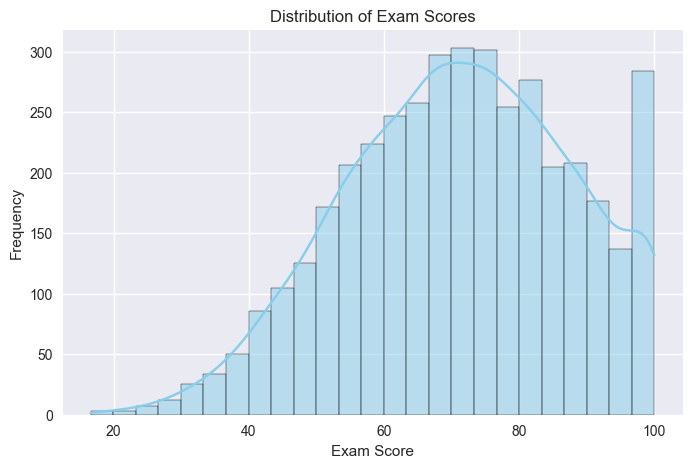

In [12]:
#  Exam_Score distribution
plt.figure()
sns.histplot(df['exam_score'], kde=True, bins=25, color='skyblue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

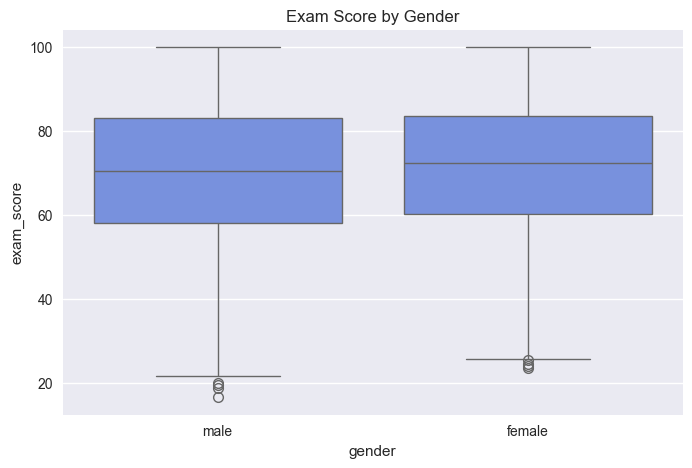

In [13]:
#  Differences between males and females in grades
plt.figure()
sns.boxplot(x='gender', y='exam_score', data=df)
plt.title('Exam Score by Gender')
plt.show()

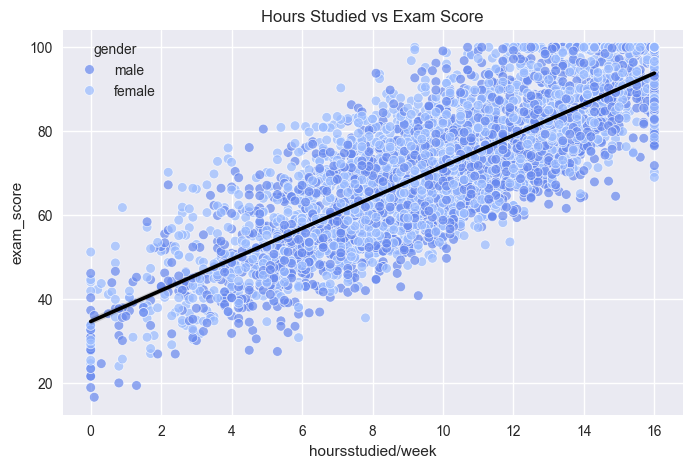

In [14]:
# The effect of study hours on grades
plt.figure()
sns.scatterplot(x='hoursstudied/week', y='exam_score', data=df, hue='gender', alpha=0.7)
sns.regplot(x='hoursstudied/week', y='exam_score', data=df, scatter=False, color='black')
plt.title('Hours Studied vs Exam Score')
plt.show()

C:\Users\Hosopa\AppData\Local\Temp\ipykernel_6244\956075472.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='tutoring', y='exam_score', data=df, ci='sd')


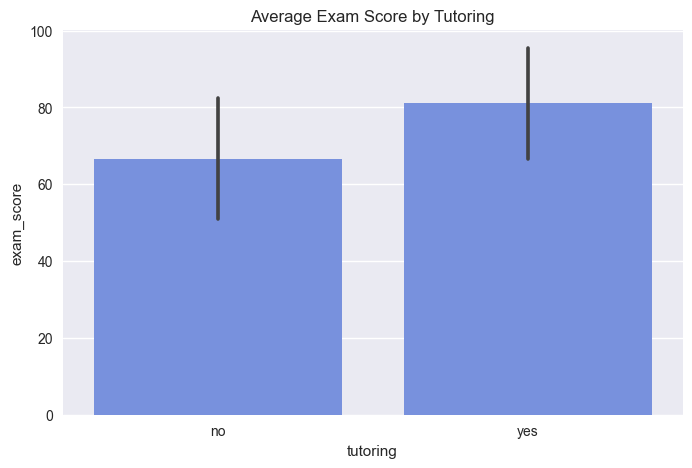

In [15]:
#  The impact of private tutoring on exam_score
plt.figure()
sns.barplot(x='tutoring', y='exam_score', data=df, ci='sd')
plt.title('Average Exam Score by Tutoring')
plt.show()


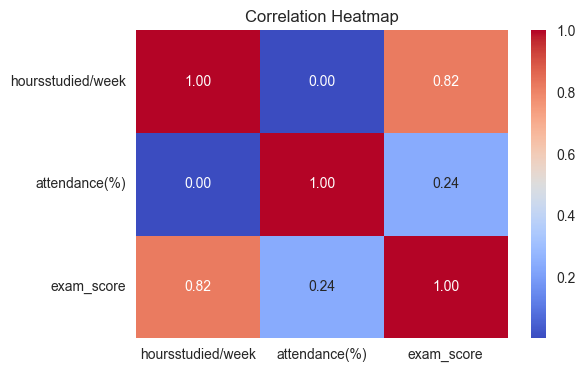

In [16]:
plt.figure(figsize=(6,4))
numeric_cols = ['hoursstudied/week', 'attendance(%)', 'exam_score']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Feature Importance – Mutual Information**

In [17]:
from sklearn.metrics import mutual_info_score

categorical= ['gender','tutoring','region','parent_education']
numerical= [r'hoursstudied/week', 'attendance(%)']
def mutual_info_churn_score(series):
    return mutual_info_score(series, df.exam_score)

mi = df[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

c:\Users\Hosopa\anaconda3\envs\AR_DS\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\Hosopa\anaconda3\envs\AR_DS\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\Hosopa\anaconda3\envs\AR_DS\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\Hosopa\anaconda3\envs\AR_DS\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for t

parent_education    0.285785
tutoring            0.177550
region              0.099732
gender              0.097092
dtype: float64

In [18]:
correlation = df[numerical].corrwith(df.exam_score)
correlation.abs()

hoursstudied/week    0.819812
attendance(%)        0.238570
dtype: float64

**Correlation – Numerical Features**

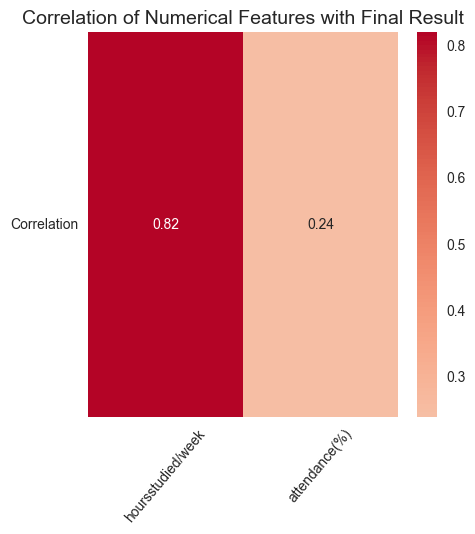

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation
correlation = df[numerical].corrwith(df.exam_score)

# Convert to DataFrame for heatmap
corr_df = correlation.to_frame(name='Correlation')

# Plot heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True)

plt.title("Correlation of Numerical Features with Final Result", fontsize=14)
plt.yticks(rotation=0)  # keep 'Correlation' label horizontal
plt.xticks(rotation=50)
plt.show()


**Train / Validation / Test Split**

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_,y_train,y_=train_test_split(df.drop('exam_score',axis=1),df.exam_score,test_size=0.3,random_state=42)

x_val,x_test,y_val,y_test=train_test_split(x_,y_,test_size=0.5,random_state=4)

In [21]:
len(x_train),len(x_val),len(x_test),len(y_train),len(y_val),len(y_test)

(2800, 600, 600, 2800, 600, 600)

# Preprocessing

**One-Hot Encoding (DictVectorizer)**

In [22]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

# dictionaries
x_train_dicts= x_train[categorical+numerical].to_dict(orient='records')
x_val_dicts= x_val[categorical+numerical].to_dict(orient='records')
x_test_dicts= x_test[categorical+numerical].to_dict(orient='records')


X_train=dv.fit_transform(x_train_dicts)
X_val = dv.transform(x_val_dicts)
X_test = dv.transform(x_test_dicts)

In [23]:
len(X_train),len(X_val),len(X_test),len(y_train),len(y_val),len(y_test)

(2800, 600, 600, 2800, 600, 600)

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(
    n_estimators=200,
    criterion='squared_error',  # default for regression
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=40,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=40,
                      n_estimators=200, random_state=42)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --- Predictions for Random Forest Regressor ---
y_pred_val_rf = rf_regressor.predict(X_val)
y_pred_test_rf = rf_regressor.predict(X_test)

# Regression metrics
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val_rf))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

val_mae = mean_absolute_error(y_val, y_pred_val_rf)
test_mae = mean_absolute_error(y_test, y_pred_test_rf)

val_r2 = r2_score(y_val, y_pred_val_rf)
test_r2 = r2_score(y_test, y_pred_test_rf)

print("\nRandom Forest Regression Results")
print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Validation MAE: {val_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Validation R²: {val_r2:.2f}")
print(f"Test R²: {test_r2:.2f}")


Random Forest Regression Results
Validation RMSE: 7.87
Test RMSE: 8.37
Validation MAE: 6.25
Test MAE: 6.61
Validation R²: 0.78
Test R²: 0.77


**Random Forest Tree Visualization**

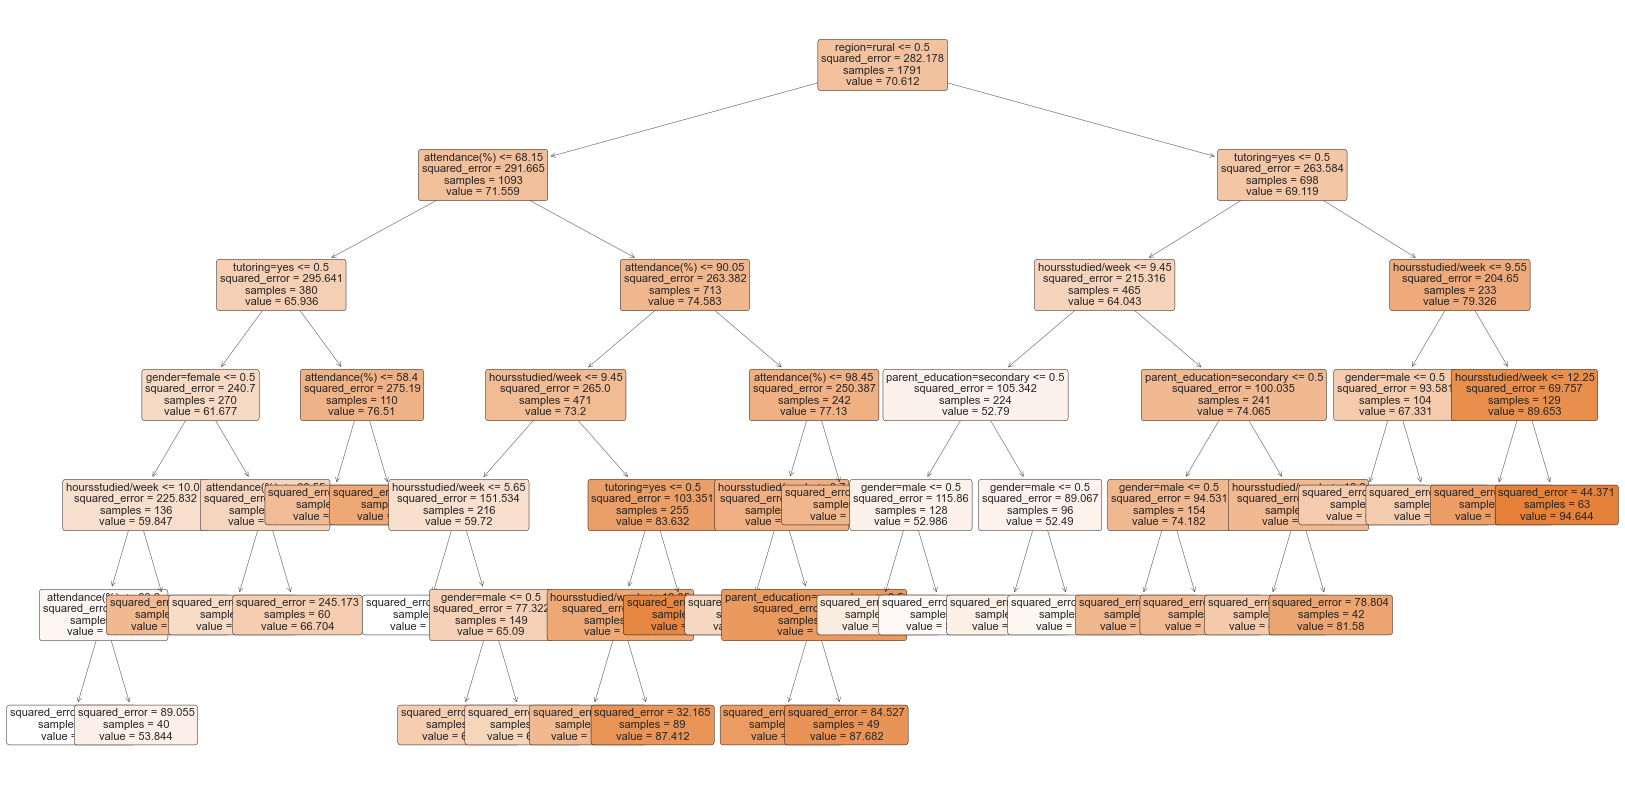

In [26]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pick one tree from the forest (e.g., the first one)
estimator = rf_regressor.estimators_[0]

# Option 1: Quick visualization with matplotlib
plt.figure(figsize=(20,10))
plot_tree(estimator,
          feature_names=dv.get_feature_names_out(),
          filled=True,
          rounded=True,
          fontsize=8)
plt.show()

# Option 2: Export to Graphviz for a cleaner, scalable diagram
export_graphviz(estimator,
                out_file="tree.dot",
                feature_names=dv.get_feature_names_out(),
                filled=True,
                rounded=True,
                special_characters=True)

# Then convert to PNG (run in terminal, not Python):
# dot -Tpng tree.dot -o tree.png


In [27]:
y_pred_test_rf = rf_regressor.predict(X_test)

results = pd.DataFrame({
    "Actual Score": y_test.values,
    "Predicted Score": y_pred_test_rf,
    "Result": ["Pass" if s >= 50 else "Faild" for s in y_pred_test_rf]
})

results.head()

,Actual Score,Predicted Score,Result
0,63.8,67.101314,Pass
1,60.1,60.644438,Pass
2,91.1,79.986090,Pass
3,73.8,70.911803,Pass
4,59.8,63.020464,Pass


# Naive Bays

In [28]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Example: pass if score >= 50, fail otherwise
y_train_class = (y_train >= 50).astype(int)
y_val_class   = (y_val >= 50).astype(int)
y_test_class  = (y_test >= 50).astype(int)

# Train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train_class)

# Predictions
y_pred_val_nb = nb_classifier.predict(X_val)
y_pred_test_nb = nb_classifier.predict(X_test)

# Evaluation
print("\nNaive Bayes Classification Results")
print(f"Validation Accuracy: {accuracy_score(y_val_class, y_pred_val_nb):.2f}")
print(f"Test Accuracy: {accuracy_score(y_test_class, y_pred_test_nb):.2f}")
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_test_nb))



Naive Bayes Classification Results
Validation Accuracy: 0.93
Test Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        82
           1       0.97      0.95      0.96       518

    accuracy                           0.93       600
   macro avg       0.84      0.88      0.86       600
weighted avg       0.93      0.93      0.93       600



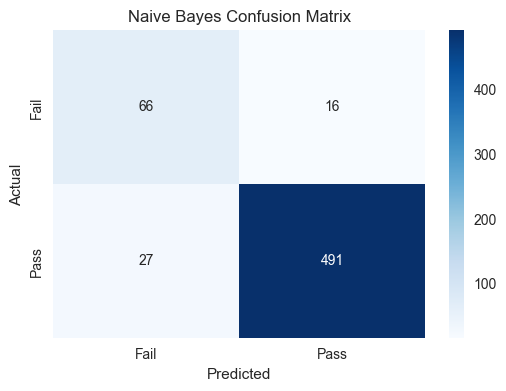

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Confusion Matrix ---
cm = confusion_matrix(y_test_class, y_pred_test_nb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail','Pass'],
            yticklabels=['Fail','Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()
